# S7 Demo Trabajo modelos predictivos "Clásicos"

https://www.kaggle.com/datasets/angeloftechml/real-state-data-of-bogota-colombia-2023

En este notebook vamos a probar elementos básicos de algunos modelos

# Regresión lineal simple

##### Basada en el tamaño del inmueble

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

# Datos de ejemplo: Precio de apartamentos y tamaño en metros cuadrados
data = {
    'Precio': [350000000, 420000000, 310000000, 500000000, 380000000, 550000000, 600000000],
    'Tamaño': [70, 85, 60, 95, 75, 100, 110]
}

# Crear un DataFrame con los datos
df_apartamentos = pd.DataFrame(data)

# Realizar la regresión lineal
X = df_apartamentos[['Tamaño']]
y = df_apartamentos['Precio']

modelo = LinearRegression()
modelo.fit(X, y)

# Obtener los coeficientes de la regresión
coeficiente = modelo.coef_[0]
intercepto = modelo.intercept_

print(f"Coeficiente: {coeficiente}")
print(f"Intercepto: {intercepto}")

Coeficiente: 6026315.789473685
Intercepto: -67951127.81954896


# Visualización de los datos

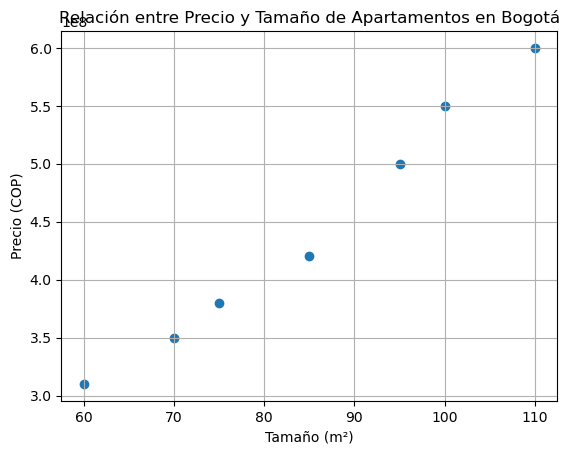

In [62]:
plt.scatter(df_apartamentos['Tamaño'], df_apartamentos['Precio'])
plt.xlabel('Tamaño (m²)')
plt.ylabel('Precio (COP)')
plt.title('Relación entre Precio y Tamaño de Apartamentos en Bogotá')
plt.grid(True)
plt.show()

# Visualización de la línea de regresión

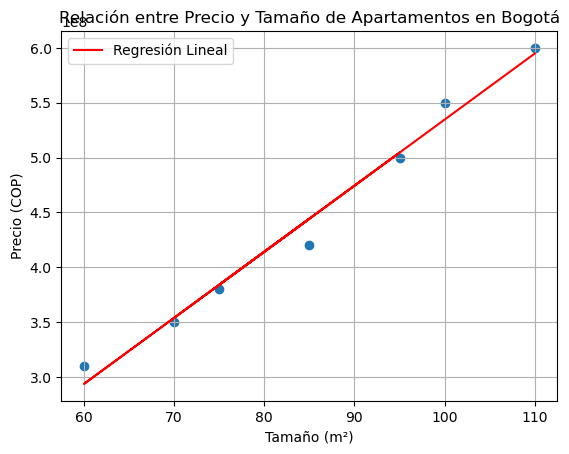

In [64]:
plt.scatter(df_apartamentos['Tamaño'], df_apartamentos['Precio'])

plt.plot(df_apartamentos['Tamaño'], modelo.predict(X), color='red', label='Regresión Lineal')

plt.xlabel('Tamaño (m²)')
plt.ylabel('Precio (COP)')
plt.title('Relación entre Precio y Tamaño de Apartamentos en Bogotá')

plt.grid(True)

plt.legend()

plt.show()

# Visualización de intervalos de confianza

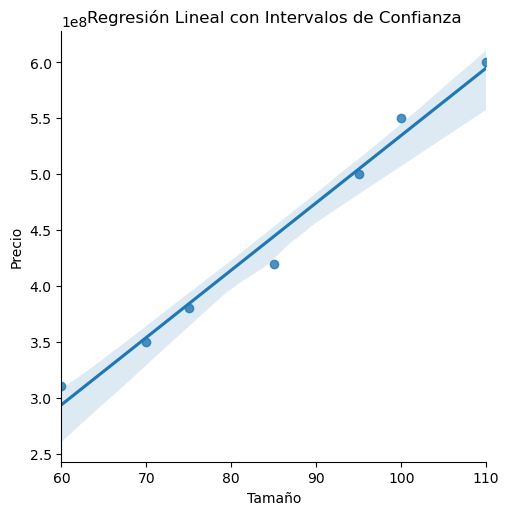

In [69]:
# Graficar la regresión lineal con intervalos de confianza
sns.lmplot(x='Tamaño', y='Precio', data=df_apartamentos, aspect=1, ci=95)
plt.xlabel('Tamaño')
plt.ylabel('Precio')
plt.title('Regresión Lineal con Intervalos de Confianza')
plt.show()

# Uso del modelo

In [70]:
# Tamaño de un nuevo apartamento para hacer la predicción
nuevo_apartamento_tamano = 97

# Hacer la predicción utilizando el modelo
precio_estimado = modelo.predict([[nuevo_apartamento_tamano]])

print(f"Tamaño del apartamento: {nuevo_apartamento_tamano} m²")
print(f"Precio estimado del apartamento: {precio_estimado[0]:,.2f} COP")


Tamaño del apartamento: 97 m²
Precio estimado del apartamento: 516,601,503.76 COP


# Ejercicio 1

##### Basada en el área únicamente

construya la predición anterior con los datos reales del dataset, realice las limpiezas correspondientes.

# Ejercicio 2

##### Basada en todas las variables

Siga las instrucciones en las diferentes celdas

In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Carga tus datos en un DataFrame de Pandas

In [ ]:
data = pd.read_csv("2023_bogota_realstate.csv") 

#### TODO: Realice un analisis descriptivo inicial por dimensión (columna)

Seleccione las variables las variables independientes (características) y tu variable dependiente (precio):

In [37]:
X = data[['area', 'rooms', 'baths', 'is_new']]
y = data['price']

# Puede incluir variables numéricas únicamente.

Realice el proceso de entrenamiento, separando la muestra de entrenamiento y la de prueba. En un contexto 80-20.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Al realizar este proceso usted obtiene un error:

_ValueError: could not convert string to float: 'Sin especificar'_


#### TODO: Realice los procesos de limpieza requeridos para eliminar dichas observaciones

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

## Evaluación del modelo

Los procesos de evaluación permiten visualizar la efectividad del modelo 

** Este es un ejericicio Dummy, las regresaciones requieren proceso de verificación previo, pero este es un ejercicio orientado a Python.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

### TODO: indique el valor para los siguientes apartamentos:

##### APTO 1

'area' : 1500
'num_cuartos' : 4
'num_garajes': 2
'num_banos': 4
'es_nuevo': Sí
'estrato' : 6

##### APTO 2

'area' : 150
'num_cuartos' : 2
'num_garajes': 1
'num_banos': 2
'es_nuevo': No
'estrato' : 5

##### APTO 3

'area' : 65
'num_cuartos' : 1
'num_garajes': 0
'num_banos': 1
'es_nuevo': No
'estrato' : 3

##### APTO 4

'area' : 86
'num_cuartos' : 3
'num_garajes': 1
'num_banos': 2
'es_nuevo': Sí
'estrato' : 4

In [ ]:
nuevo_apartamento = np.array([[1500, 3, 1, 2, 1]])  # Características del nuevo apartamento
precio_predicho = model.predict(nuevo_apartamento)
print("Precio predicho:", precio_predicho)

In [39]:
from sklearn.metrics import r2_score

r2 = r2_score(y, model.predict(X))
print("Coeficiente de Determinación (R^2):", r2)


Coeficiente de Determinación (R^2): 0.5128834271947373


In [40]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, model.predict(X))
print("Error Cuadrático Medio (MSE):", mse)


Error Cuadrático Medio (MSE): 2383270524.947491
